In [1]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Modeling non-linear relationship using Polynomial Regtression

In [2]:
data = pd.read_csv('AR - Examples - 1.6.csv')
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


<Axes: xlabel='number_courses', ylabel='Marks'>

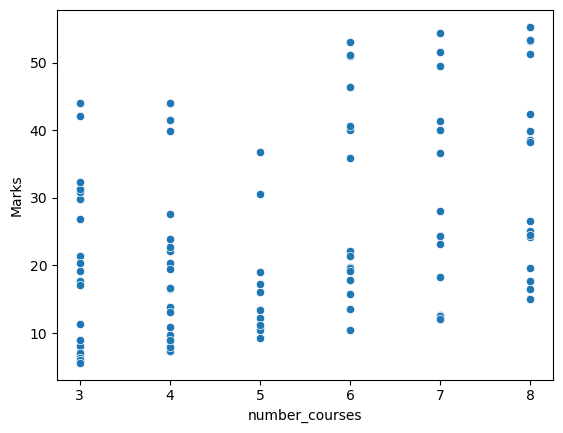

In [3]:
# plotting the scatter plot 
sns.scatterplot(data=data, x = 'number_courses', y = 'Marks')

<Axes: xlabel='time_study', ylabel='Marks'>

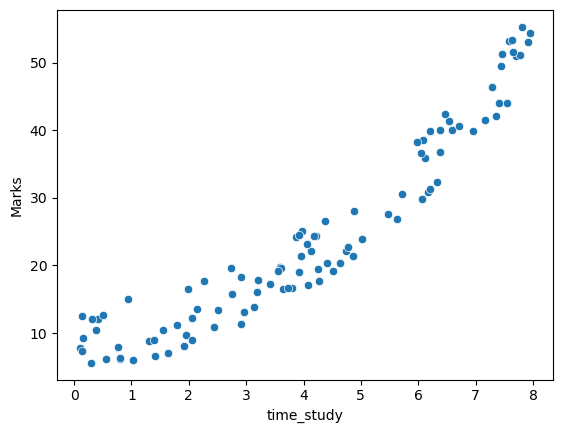

In [4]:
# plotting the scatter plot 
sns.scatterplot(data=data, x= 'time_study', y='Marks')

In [5]:
# Splitting the dataset into X and y
X = data[['number_courses' , 'time_study']]
y = np.array(data['Marks']).reshape(-1,1)

In [6]:
# Building the regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [7]:
# Prediction on the basis of the model
y_pred = reg.predict(X)
#y_pred

In [8]:
# find the value of r squred
r2_score(y, y_pred)

0.9403656320238896

In [9]:
# Calculate beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[-7.45634623]
[[1.86405074 5.39917879]]


In [10]:
# Metrics to given a overall sense in the model
rss = np.sum(np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1211.6962069108952
12.116962069108952
3.4809426983374707


In [11]:
# Residual analysis
y_res = y-y_pred
#y_res

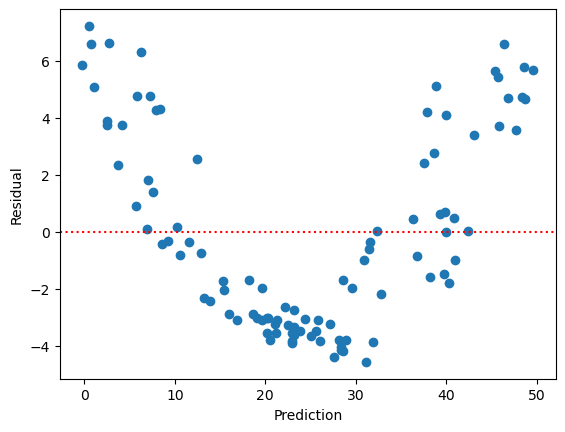

In [12]:
data['res'] = y_res
plt.scatter(y_pred, data['res'])
plt.axhline(y = 0, color='r', linestyle=':')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

Checking which variable is non-linearly related to the response value

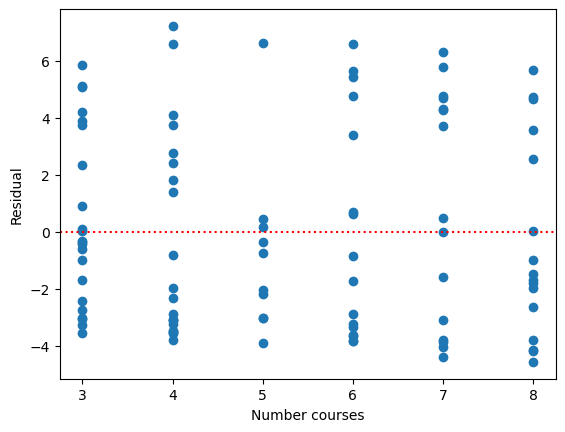

In [13]:
data['rse'] = y_res
plt.scatter(data['number_courses'], data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Number courses')
plt.ylabel('Residual')
plt.show()

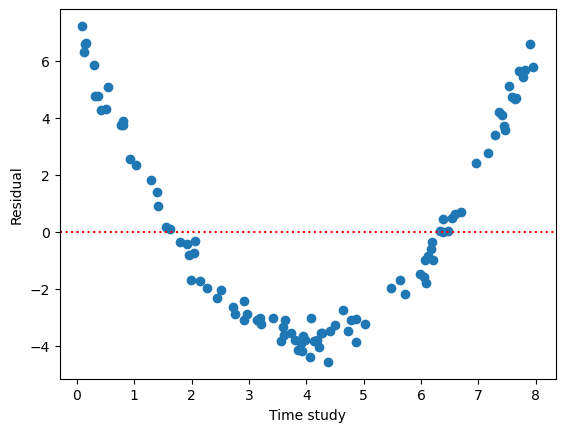

In [14]:
plt.scatter(data['time_study'], data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Time study')
plt.ylabel('Residual')
plt.show()

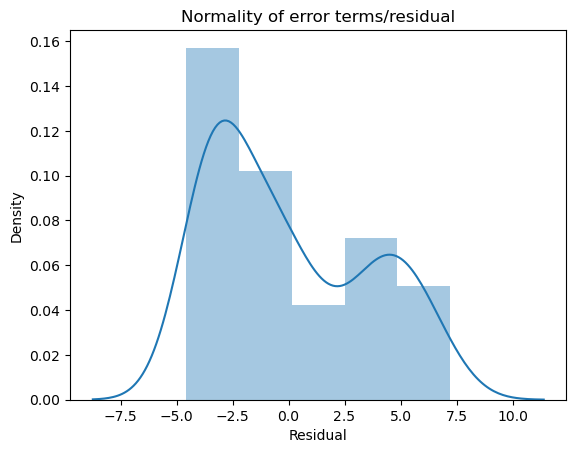

In [15]:
p = sns.distplot(y_res, kde=True)
p = plt.title('Normality of error terms/residual')
plt.xlabel('Residual')
plt.show()

## Fitting Polynomial Regression Model

In [16]:
# Transforming the time_study variable
data['time_study_squared'] = data['time_study']*data['time_study']

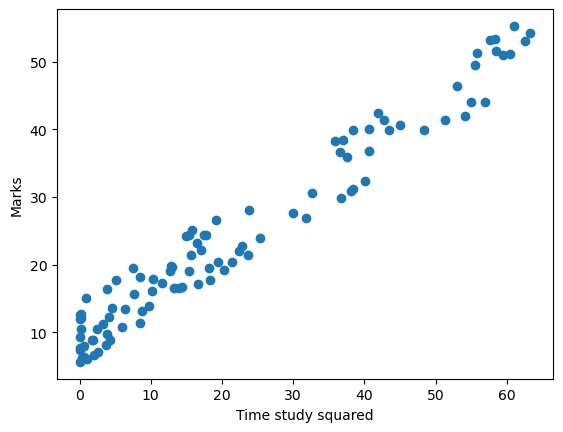

In [17]:
plt.scatter(data['time_study_squared'], data['Marks'])
plt.xlabel('Time study squared')
plt.ylabel('Marks')
plt.show()

In [18]:
# Splitting the dataset into x and y
X = data[['number_courses', 'time_study', 'time_study_squared']]
y = np.array(data['Marks']).reshape(-1,1)

In [19]:
# Building a linear regression model
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [20]:
# Prediction on the basis of the model
y_pred = reg.predict(X)
#y_pred

In [21]:
r2_score(y,y_pred)

0.9996529294889802

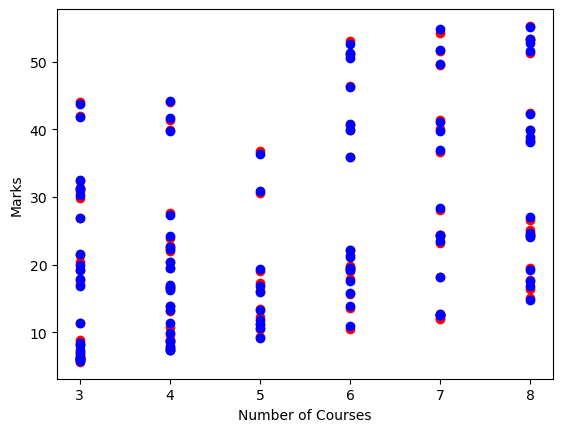

In [22]:
plt.scatter(X['number_courses'],y,color='red')
plt.scatter(X['number_courses'],y_pred,color='blue')
plt.xlabel('Number of Courses')
plt.ylabel('Marks')
plt.show()

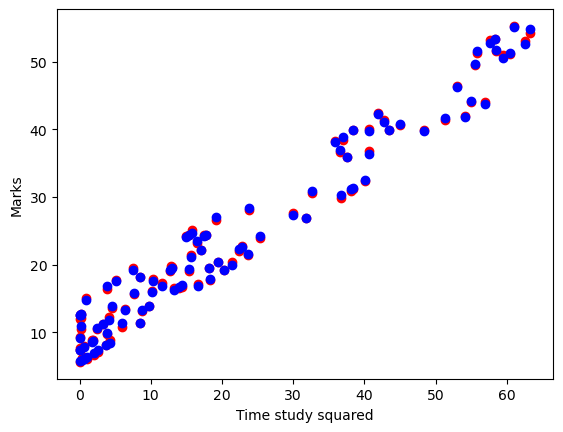

In [23]:
plt.scatter(X['time_study_squared'],y,color='red')
plt.scatter(X['time_study_squared'],y_pred,color='blue')
plt.xlabel('Time study squared')
plt.ylabel("Marks")
plt.show()

In [24]:
# Calculate beta0 and beta1
print(reg.intercept_)
print(reg.coef_)

[0.56299581]
[[ 1.70546941 -0.02855268  0.67346253]]


In [25]:
# Residual sum of squares = mean_squared_error * Total number of datapoints
rss = np.sum(np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y, y_pred)
print(mse)
rmse=mse**0.5
print(rmse)

7.052041230683781
0.07052041230683781
0.265556796762647


In [26]:
# Residual analysis
y_res = y - y_pred
#y-res

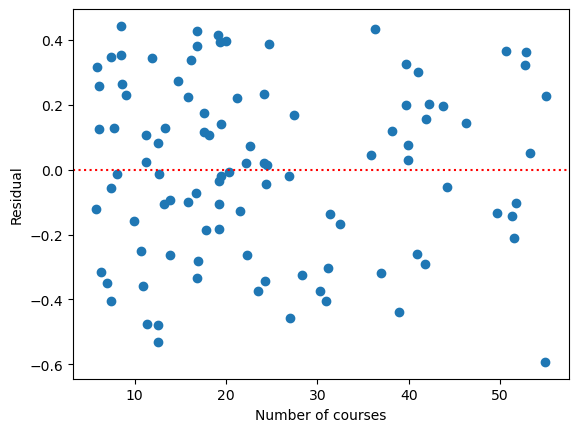

In [27]:
data['res'] = y_res
plt.scatter(y_pred, data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Number of courses')
plt.ylabel('Residual')
plt.show()

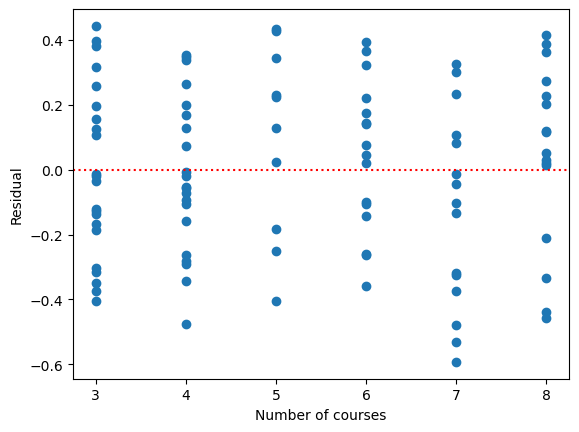

In [28]:
data['res'] = y_res
plt.scatter(data['number_courses'],data['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Number of courses')
plt.ylabel('Residual')
plt.show()

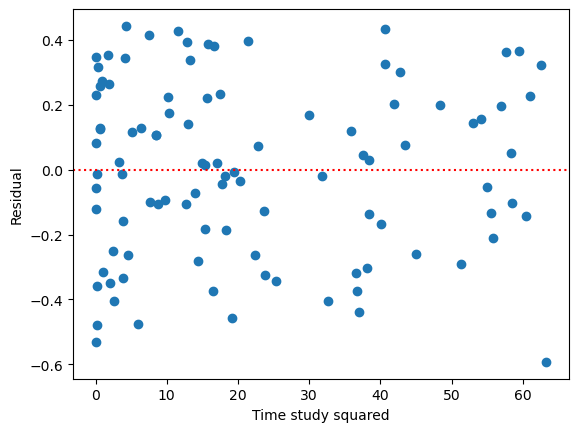

In [29]:
plt.scatter(data['time_study_squared'],data['res'])
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel('Time study squared')
plt.ylabel('Residual')
plt.show()

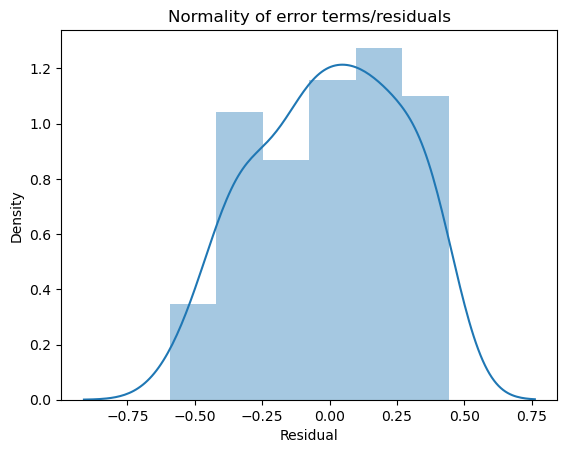

In [30]:
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel('Residual')
plt.show()

## Modeling non-linear relationships using data transformation

here, we need to make a model which predict how much distance is covered by a truck in a given time unit after a break is applied.

In [31]:
dist = pd.read_csv(r'AR - Examples - 1.5.csv')
dist.head()

,time,distance
0,1,0.419660
1,2,1.350692
2,3,2.470342
3,4,1.566856
4,5,1.595280


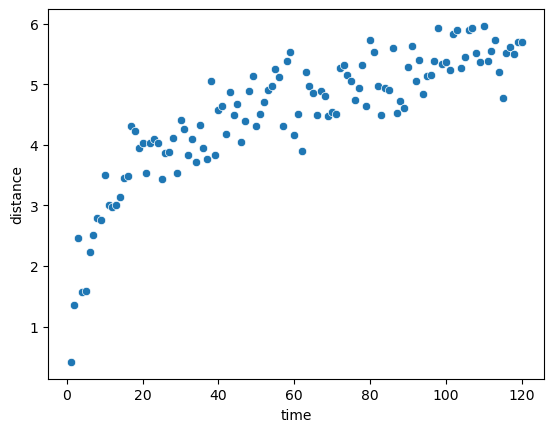

In [32]:
# Plotting a scatter plot
sns.scatterplot(data=dist, x='time', y='distance')
plt.show()

In [33]:
X = np.array(dist['time']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [34]:
# Building the regression model
model = LinearRegression()

In [35]:
model.fit(X, y)

LinearRegression()

In [36]:
# Predictions on the basis of the model
y_pred2 = model.predict(X)
#y_pred2

In [37]:
# Find the value of r squared
r2_score(y, y_pred2)

0.7019700219367477

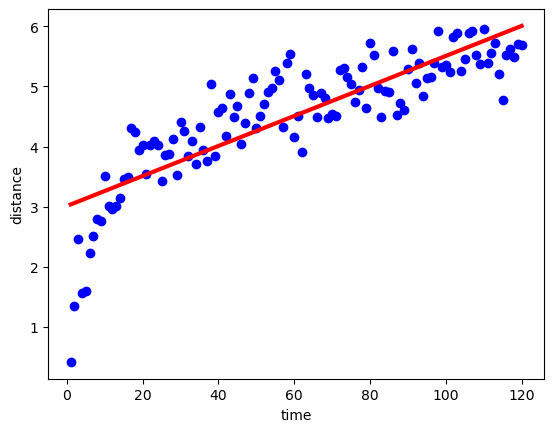

In [38]:
plt.scatter(X, y, color= 'blue')
plt.plot(X, y_pred2, color='red', linewidth = 3)
plt.xlabel('time')
plt.ylabel('distance')
plt.show()

In [39]:
# Calculate beta0, and beta1
print(model.intercept_)
print(model.coef_)

[3.01233335]
[[0.02494362]]


In [40]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y - y_pred2))
print(rss)
mse = mean_squared_error(y, y_pred2)
print(mse)
rmse = mse**0.5
print(rmse)

38.035808448707726
0.3169650704058977
0.5629965101187553


In [41]:
#residual
residual = y - y_pred2

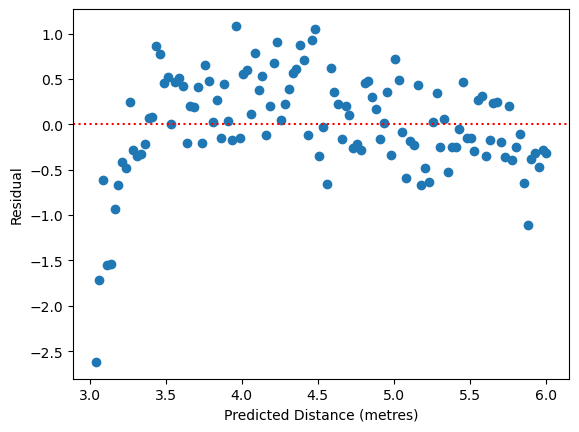

In [42]:
# Scatter plot of the predicted values on the x-axis and the residual on the y-axis
plt.scatter(y_pred2, residual)
plt.axhline(y=0, color='r',linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel('Residual')
plt.show()

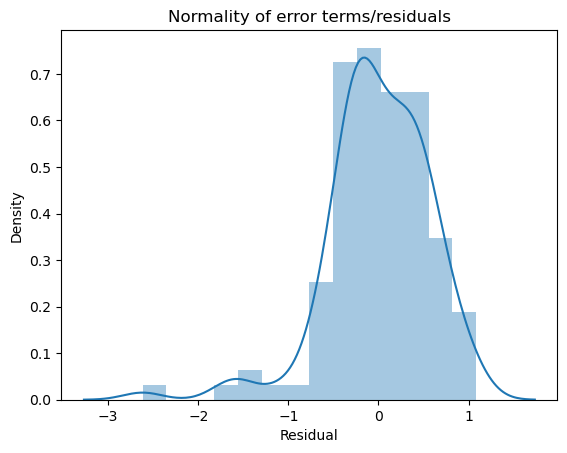

In [43]:
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel('Residual')
plt.show()

In [44]:
# As we can see that the residuals do not fulfill the conditions for linear regression, Lets see if we can make some changes so that the residuals are normally distributed.
dist['time (seconds)(log)'] = np.log(dist['time'])

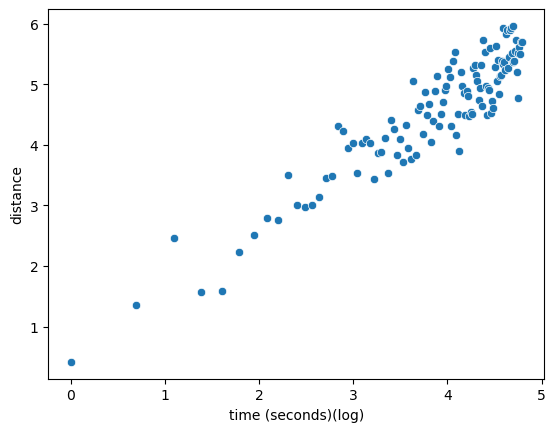

In [45]:
sns.scatterplot(data=dist, x='time (seconds)(log)', y= 'distance' )
plt.show()

In [46]:
# Spliting the dataset into X and y
X = np.array(dist['time (seconds)(log)']).reshape(-1,1)
y = np.array(dist['distance']).reshape(-1,1)

In [47]:
# Building a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [56]:
y_pred3 = model.predict(X)
#y_pred3

In [57]:
#Find the R squared
r2_score(y, y_pred3)

0.8717123012103077

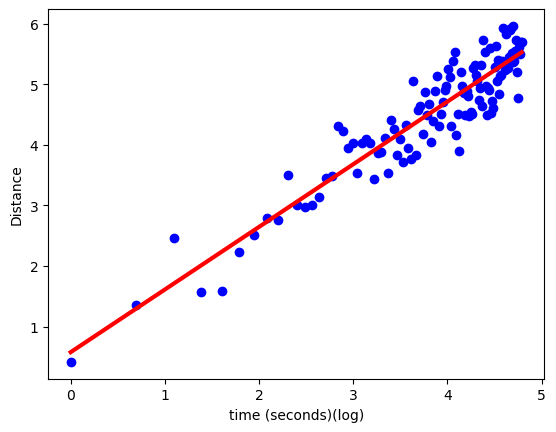

In [58]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred3, color='red', linewidth = 3)
plt.xlabel('time (seconds)(log)')
plt.ylabel('Distance')
plt.show()

In [51]:
# Calculations of beta0 and beta1
print(model.intercept_)
print(model.coef_)

[0.58066733]
[[1.03293534]]


In [59]:
rss = np.sum(np.square(y-y_pred3))
print(rss)
mse = mean_squared_error(y,y_pred3)
print(mse)
rmse = mse**0.5
print(rmse)

16.3726024113408
0.13643835342784
0.36937562646693406


In [60]:
# Residual
y_rss = y - y_pred3

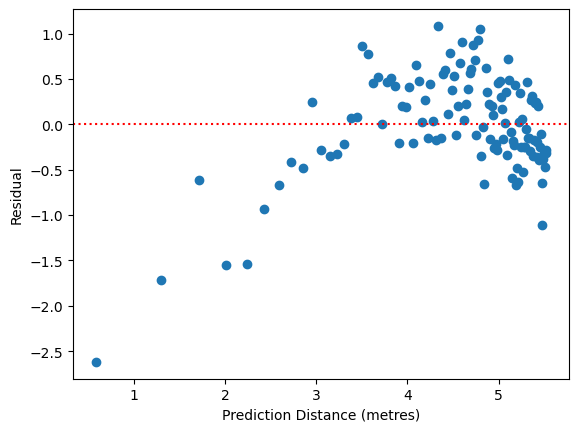

In [61]:
plt.scatter( y_pred3, residual)
plt.axhline(y=0, color ='r', linestyle=':')
plt.xlabel('Prediction Distance (metres)')
plt.ylabel('Residual')
plt.show()